# Backup Coverage Location Problem（BCLP）

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-0">Problem Description</a></span><ul class="toc-item"><li><span><a href="#BCLP" data-toc-modified-id="BCLP-0.1">BCLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-0.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-1">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-1.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-2">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-synthetic-data" data-toc-modified-id="Case1.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-synthetic-data-2.1">Case1. Solving BCLP (Backup Covering Location Problems) with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-real-world-data" data-toc-modified-id="Case2.-Solving-BCLP-(Backup-Covering-Location-Problems)-with-real-world-data-2.2">Case2. Solving BCLP (Backup Covering Location Problems) with real-world data</a></span><ul class="toc-item"><li><span><a href="#Solving-BCLP" data-toc-modified-id="Solving-BCLP-2.2.1">Solving BCLP</a></span></li></ul></li></ul></li></ul></div>

## Problem Description

### BCLP
In the coverage-based location model, demand is considered "covered" only when it is completely within the coverage area of the facility. The Backup Coverage Location Problem considers that a secondary (or alternate) facility that covers the demand point is provided to ensure the demand point is served when the first cover facility is unavailable. Under budget constraints, primary and secondary coverage can be formulated as a multi-objective optimization problem called BCLP<sup>[1]</sup>.


*Parameters*:

* **$i$** : Index of demand, $i = 1,..., n$
* **$j$** : Index of potential facility location, $j = 1,..., m$
* **$ N_i $** : {$j$ | $λ_{ij} = 1$}
* **$ a_i $** : Importance of demand $i$
* **$ p $** : Number of facilities to be located


*Decision variables*:
$
$\begin{array}
$ x_j= \begin{cases}1, & \text { if a facility is located at } j, \\ 0, & \text { else }\end{cases}\\
 y_i= \begin{cases}1, & \text { if demand } i \text{ is covered by a sited facility }, \\ 0, & \text { else }\end{cases}\\
 u_i= \begin{cases}1, & \text { if demand } i \text{ is covered twice }, \\ 0, & \text { else }\end{cases}\\
 λ_{i j}= \begin{cases}1, & \text { if demand } i \text { is covered by a potential facility } j, \\ 0, & \text { else }\end{cases}
\end{array}$
$

###  Integer programming model:

\begin{array}{lll}
\max & Z_{1}=\sum_{i}{a_iy_i} && (1)\\
\max & Z_{2}=\sum_{i}{a_iu_i} && (2)\\
\text { s.t. } & \sum_{j\in N_i}{x_j-y_i-u_i \geq 0} & \forall i & (3)\\
            & u_i-y_i \leqslant 0 & \forall i & (4)\\
            & \sum_{j}{x_j = p} &&  (5)\\
            & x_j = \{0,1\} & \forall j & (6)\\
            & y_i, u_i = \{0,1\} & \forall i & (7)\\
\end{array}

* The objective (1) maximizes primary coverage and the objective (2) maximizes backup (or overlapping) coverage. <br>
* Constraints (3) and (4) determine which areas have backup coverage. Area $i$ receives backup coverage only when two or more facilities can cover it. <br>
* Constraints (3) ensure that backup coverage is provided only when primary coverage is also provided. <br>
* The number of facilities covering an area is tracked by constraint (4). <br>
* Constraints (5) determine the number of facilities. 
* Constraints (6) and (7) indicate integer requirements.<br>

[1] Pirkul H, Schilling D. The capacitated maximal covering location problem with backup service[J]. Annals of Operations Research, 1989, 18(1): 141-154.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib, and Hispot libraries to set up an environment

In [1]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.coverage import BCLP

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [2]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

['CPLEX_CMD', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

In this part, we will display two types of data as examples, including synthetic data and real data.

### Case1. Solving BCLP (Backup Covering Location Problems) with synthetic data

Generate problem with synthetic data

In [3]:
radius = 0.2
num_points = 50
num_facilities = 8
setup_cost = np.random.randint(1,2, size=num_points)
points = [(random.random(), random.random()) for i in range(num_points)]
points_np = np.array(points)


In [4]:
centers, cover_twice, obj = BCLP(num_located=num_facilities,
                                 num_points=num_points,
                                 points=points_np,
                                 radius=radius,
                                 setup_cost=setup_cost,
                                 solver=PULP_CBC_CMD()).prob_solve()


Status: Optimal
Selected points = [0, 8, 10, 21, 36, 45, 46, 48]
Covered twice points = [0, 2, 4, 8, 10, 12, 13, 15, 16, 18, 21, 22, 23, 25, 26, 27, 30, 32, 37, 38, 40, 43, 45, 46, 47, 49]
The objective is =  68.0


In [5]:
from matplotlib.patches import Circle
def display_points_with_bclp(data, centers, radius):
    ax = plt.gca()
    plt.xlim(-0.3, 1.1)
    plt.ylim(-0.2, 1.3)
    plt.scatter(data[:, 0], data[:, 1], c='blue', label='Demand Points')
    for i in centers:
        plt.scatter(data[i][0], data[i][1], c='red', s=100, marker='*')
        circle = Circle(xy=(data[i][0], data[i][1]), radius=radius, color='black', fill=False, lw=2)
        ax.add_artist(circle)
    plt.scatter(data[i][0], data[i][1], c='red', marker='*', s=100, label='Centers')

Visualize optimal solution

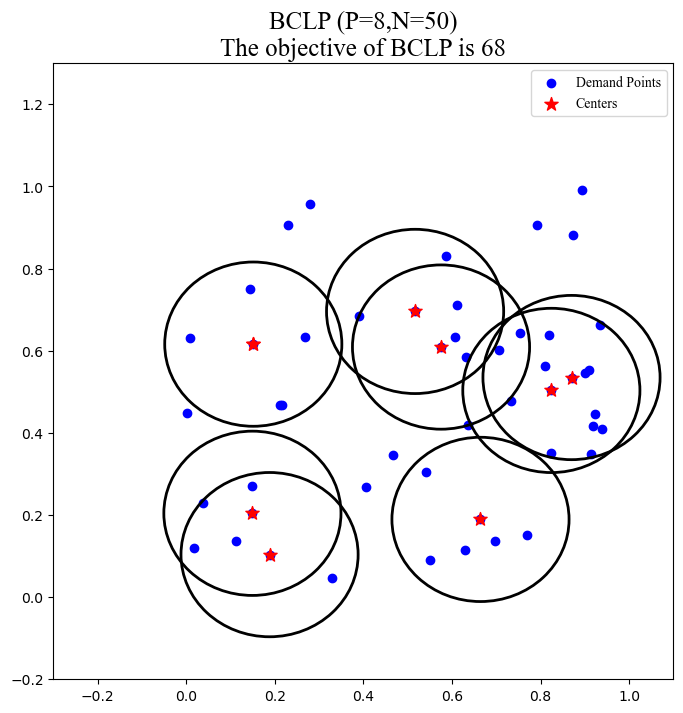

In [6]:
fig = plt.figure(figsize=(8, 8))
name = 'BCLP (P=' + str(num_facilities) + ',N=' + str(num_points) + ')\nThe objective of BCLP is ' + str(round(obj))
plt.title(name, font = 'Times New Roman', fontsize = 18)
display_points_with_bclp(points_np, centers, radius)
plt.legend(loc='best', prop='Times New Roman', fontsize = 18) 
plt.show()

### Case2. Solving BCLP (Backup Covering Location Problems) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [7]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Xicheng District of Beijing the study area and read partial poi points in Xicheng District.

In [8]:
%%time
region=gpd.read_file("../data/beijing/xicheng/xicheng.shp")
region.head(2)

CPU times: total: 15.6 ms
Wall time: 11.8 ms


,Name,Layer,geometry
0,牛街街道,乡镇,"POLYGON ((116.35744 39.88798, 116.36069 39.887..."
1,西长安街街道,乡镇,"POLYGON ((116.37223 39.89854, 116.36903 39.898..."


Partial POI data in Changping district

In [9]:
%%time
poi = gpd.read_file("../data/beijing/xicheng/xicheng-poi.shp")
poi.shape[0]

CPU times: total: 0 ns
Wall time: 5.16 ms


24

In [10]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

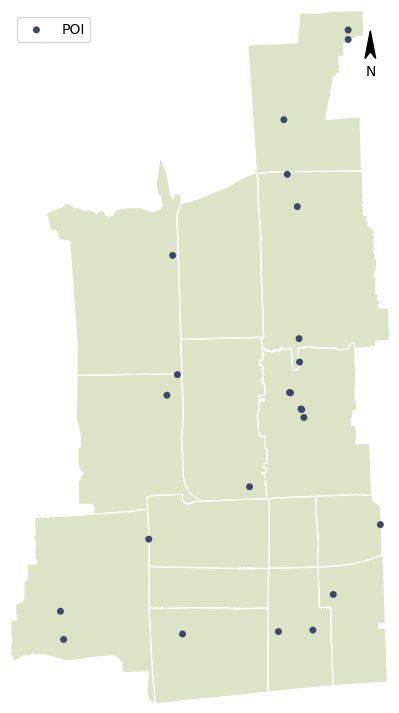

In [12]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#DBE4C6",
                   figsize=(9, 9))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color= '#3C486B',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)

#### Solving BCLP

In [13]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
num_located = int(poi.shape[0]/5)
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)
setup_cost = np.random.randint(1, 2, size=num_points)
radius = 0.01

In [14]:
num_located

4

In [15]:
centers, cover_twice, obj = BCLP(num_located=num_located,
                                 num_points=num_points,
                                 points=points_np,
                                 radius=radius,
                                 setup_cost=setup_cost,
                                 solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [3, 4, 6, 7]
Covered twice points = [0, 3, 4, 10, 11, 13, 19]
The objective is =  20.0


prepare the LineString and center Points to plot the solution

In [16]:
center_points = poi.iloc[centers]

In [17]:
from shapely.geometry.polygon import Polygon
def gen_circile_gdf(centers, radius, num_segments = 100):
    crs = 'EPSG:2381'
    Circles = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
    k=0
    for center in centers:
        angles = [i * (360 / num_segments) for i in range(num_segments)]
        points = [(center[0] + radius * np.cos(np.radians(a)), center[1] + radius * np.sin(np.radians(a))) for a in angles]
        circle = Polygon(points)
        Circles.loc[k] = [k+1, circle]
        k = k+1
    return Circles

In [18]:
coverage = gen_circile_gdf(points_np[centers], radius)

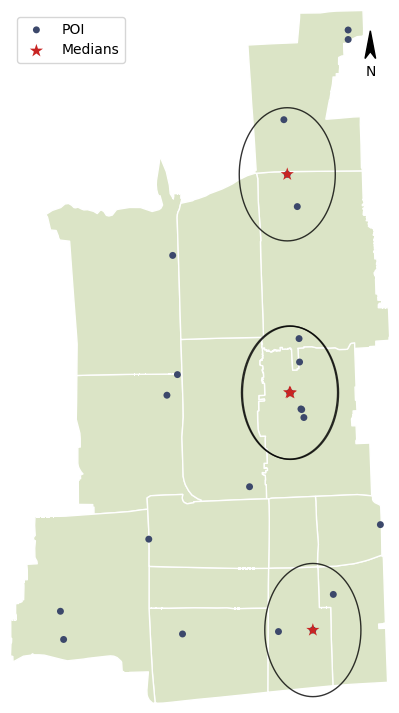

In [19]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#DBE4C6",
                   figsize=(9, 9))
gplt.polyplot(coverage,
              projection=gcrs.AlbersEqualArea(),
#               projection='equal_area',
              edgecolor="black", 
              alpha=0.8,
              zorder=1,
              ax=ax)

gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='#3C486B',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='#C82423',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Medians',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')
